In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the required libraries.

In [51]:
from sklearn.cluster import KMeans, k_means #For clustering
from sklearn.decomposition import PCA #Linear Dimensionality reduction.

In [52]:
df = pd.read_csv("sales_data_sample.csv", encoding = 'unicode_escape') #Loading the dataset.

In [53]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [54]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1) #Dropping the categorical uneccessary columns along with columns having null values. Can't fill the null values are there are alot of null values.

In [55]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [56]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [57]:
productline = pd.get_dummies(df['PRODUCTLINE'], dtype = int) #Converting the categorical columns. 
Dealsize = pd.get_dummies(df['DEALSIZE'], dtype = int)
df = pd.concat([df,productline,Dealsize], axis = 1)

In [58]:
df = df.drop(['COUNTRY','PRODUCTLINE','DEALSIZE', 'ORDERDATE'], axis=1)

In [59]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0


In [60]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes #Converting the datatype.

In [61]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,1,0,0,0,0,0,0,1,0


## Plotting the Elbow Plot to determine the number of clusters. 

In [62]:
distortions = [] # Within Cluster Sum of Squares from the centroid
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)   #Appeding the intertia to the Distortions 

/home/kalp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kalp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kalp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kalp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### As the number of k increases Inertia decreases.
### Observations: A Elbow can be observed at 3 and after that the curve decreases gradually.

In [63]:
X_train = df.values

In [64]:
model = KMeans(n_clusters = 3, random_state = 2)
model = model.fit(X_train)
pred = model.predict(X_train)

/home/kalp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
unique, counts = np.unique(pred, return_counts = True)
counts = counts.reshape(1,3)
counts_df = pd.DataFrame(counts, columns = ['C1', 'C2', 'C3'])

In [66]:
counts_df.head()

,C1,C2,C3
0,1360,375,1088


### Visulaization

In [67]:
pca = PCA(n_components=2) #Converting all the features into 2 columns to make it easy to visualize using Principal COmponent Analysis.

In [68]:
X_train = pca.fit_transform(X_train)
reduced_x = pd.DataFrame(X_train,columns=['PCA1','PCA2']) #Creating a DataFrame.
reduced_X['Clusters'] = pred #Adding the Clusters to the reduced dataframe.
reduced_x

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196
...,...,...
2818,-1310.189713,45.876215
2819,423.701036,72.572416
2820,1862.595670,95.398858
2821,-1438.640580,51.465584


In [69]:
model.cluster_centers_ #Finding the centriods. (3 Centriods in total. Each Array contains a centroids for particular feature )

array([[ 3.07860294e+01,  7.00256985e+01,  6.66985294e+00,
         2.11891932e+03,  2.71764706e+00,  7.09338235e+00,
         2.00381397e+03,  7.84757353e+01,  6.25088235e+01,
         2.64705882e-01,  1.21323529e-01,  1.29411765e-01,
         1.00735294e-01,  3.75000000e-02,  9.26470588e-02,
         2.53676471e-01,  2.08166817e-17,  5.73529412e-02,
         9.42647059e-01],
       [ 4.46106667e+01,  9.98936800e+01,  5.78400000e+00,
         7.08806629e+03,  2.70133333e+00,  7.03733333e+00,
         2.00389067e+03,  1.45581333e+02,  3.17040000e+01,
         5.33333333e-01,  1.06666667e-01,  7.20000000e-02,
         2.13333333e-02,  1.33333333e-02,  1.30666667e-01,
         1.22666667e-01,  4.18666667e-01,  5.81333333e-01,
        -5.55111512e-16],
       [ 3.71957721e+01,  9.51038511e+01,  6.44669118e+00,
         4.12947951e+03,  2.72334559e+00,  7.11029412e+00,
         2.00379044e+03,  1.13051471e+02,  5.04604779e+01,
         3.74080882e-01,  1.15808824e-01,  9.46691176e-02,
    

In [70]:
reduced_centers = pca.transform(model.cluster_centers_) #Transforming the centroids into 3 in x and y coordinates

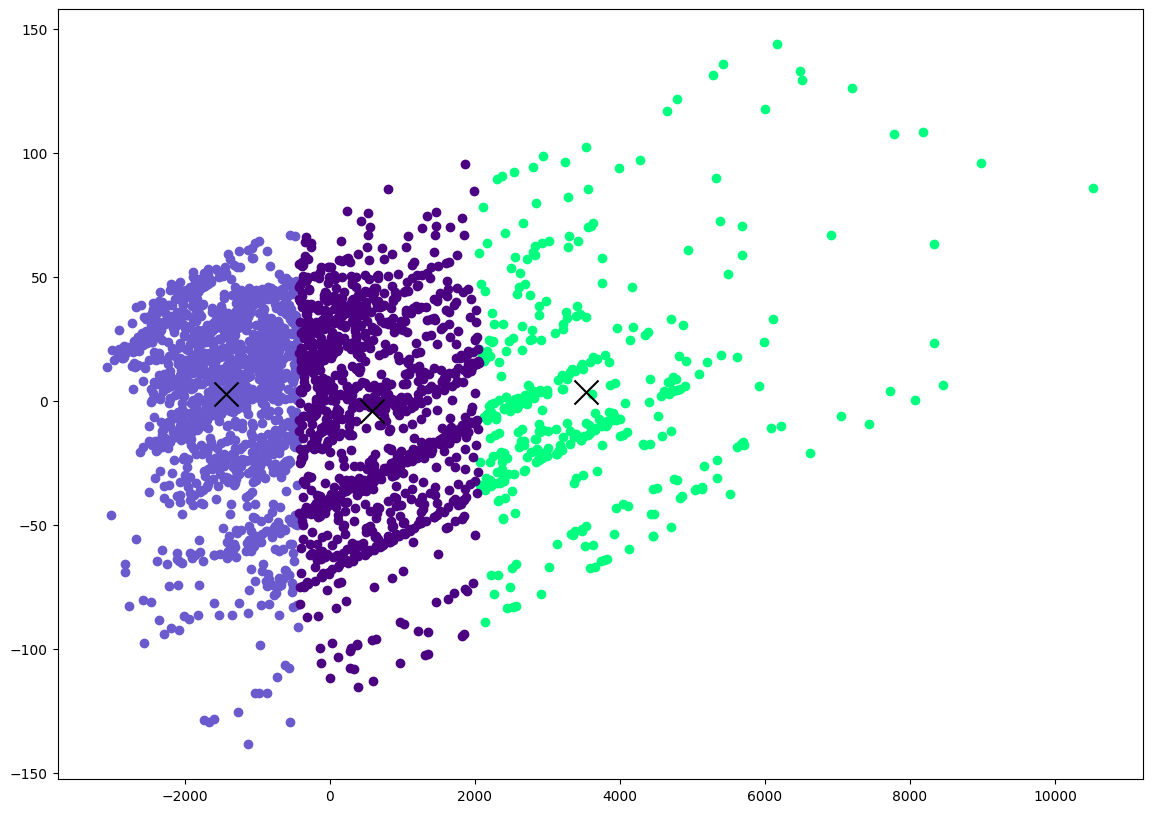

In [71]:
#Plotting the clusters 
plt.figure(figsize=(14,10))
#                     taking the cluster number and first column           taking the same cluster number and second column      Assigning the color
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')


plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)